# Тестовое задание на аналитику рынка недвижимости

Примечание:

Было дано два набора данных для каждого задания.

В заданиях было указано, что наборы данных не требуют предобработки.

In [1]:
# загружаем нужные библиотеки

import requests
from urllib.parse import urlencode
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# создаем функцию для получения данных с Яндекс.Диска

def file_download(file_url, file_name):

    # подготавливаем ссылки
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    public_key = file_url

    # получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    download_response = requests.get(download_url)

    # открываем файл
    with open(file_name, 'wb') as f:
        f.write(download_response.content)

    # читаем файл и записываем в переменную
    file = pd.read_excel(file_name)

    return file

In [3]:
# получем данные и записываем их в переменные

df1 = file_download('https://disk.yandex.by/i/l9SMTXO1tm89aQ', 'data_1.xlsx')
df2 = file_download('https://disk.yandex.by/i/xVAF7WOqXbu92Q', 'data_2.xlsx')

In [4]:
# создаем функцию для первичного обзора данных

def first_check(dataset):

    print('Первые 10 строк таблицы \n')
    display(dataset.head(10))

    print('-'*50)
    print('Последние 10 строк таблицы \n')
    display(dataset.tail(10))

    print('-'*50)
    print('Информация о таблице \n')   
    dataset.info()

    print('-'*50)
    print('Характеристики чисел в таблице \n')  
    display(dataset.describe())

    print('-'*50)
    print('Наименование колонок \n')  
    print(dataset.columns)
    
    print('-'*50)
    print('Количество дубликатов: {}\n'.format(dataset.duplicated().sum()))

## Задание 1

Рассчитать:
* среднюю цену квадратного метра квартир,
* среднюю цену квадратного метра дешевых квартир,
* среднюю цену квадратного метра дорогих квартир,
* индекс разброса цен на квадратный метр.

Визуализировать полученные результаты.

In [5]:
# применяем функцию для первичного обзора данных
first_check(df1)

Первые 10 строк таблицы 



,адрес,количество комнат,цена квартиры,площадь квартиры
0,"Чернышевского ул., 11",1,76018,36.60
1,"Сторожовская ул., 6",1,507760,230.80
2,"Коласа ул., 49",1,63008,32.00
3,"Рокоссовского просп., 82",3,119964,78.00
4,"Белецкого ул., 10/2",1,48989,33.60
5,"Городской Вал ул., 9",2,100006,55.10
6,"Казарменный пер., 5/а",2,79525,58.26
7,"Купалы ул., 9",2,138975,58.10
8,"Неманская ул., 2",3,94892,61.30
9,"Михайлова ул., 3",3,130032,84.00


--------------------------------------------------
Последние 10 строк таблицы 



,адрес,количество комнат,цена квартиры,площадь квартиры
5504,"Тикоцкого ул., 26",2,58976,48.5
5505,"Белинского ул., 12",2,50783,43.0
5506,"Матусевича ул., 68",2,98264,72.2
5507,"Лещинского ул., 13",1,46803,35.7
5508,"Богдановича ул., 89",1,48789,33.1
5509,"Связистов ул., 11",1,57021,45.8
5510,"Налибокская ул., 42",2,68985,55.1
5511,"Лобанка ул., 11",1,51887,34.8
5512,"Якубова ул., 28",3,74984,63.6
5513,"Коласа ул., 65",2,74971,66.7


--------------------------------------------------
Информация о таблице 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5514 entries, 0 to 5513
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   адрес              5514 non-null   object 
 1   количество комнат  5514 non-null   int64  
 2   цена квартиры      5514 non-null   int64  
 3   площадь квартиры   5514 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 172.4+ KB
--------------------------------------------------
Характеристики чисел в таблице 



,количество комнат,цена квартиры,площадь квартиры
count,5514.000000,5514.000000,5514.000000
mean,2.150889,80066.253174,58.151625
std,0.924745,49063.757026,26.331801
min,1.000000,28698.000000,21.000000
25%,1.000000,52008.000000,41.000000
50%,2.000000,65026.000000,51.200000
75%,3.000000,87972.500000,68.000000
max,4.000000,789995.000000,394.800000


--------------------------------------------------
Наименование колонок 

Index(['адрес', 'количество комнат', 'цена квартиры', 'площадь квартиры'], dtype='object')
--------------------------------------------------
Количество дубликатов: 35



In [6]:
# заменим наименование столбцов для удобства
df1.columns = ['address', 'room_count', 'price', 'square']

# добавляем колонку с ценой квадратного метра
df1['one_m_price'] = df1['price'] / df1['square']

In [7]:
# чтобы определить самые дешевые и самые дорогие квартиры, нужно взять 20%
# самых дешевых и 20% самых дорогих квартир;
# посмотрим на величины порогов

df1['price'].quantile([0.20, 0.80])

0.2    49900.6
0.8    95030.6
Name: price, dtype: float64

In [8]:
# создаем таблицу со средними показателями по стоимости квадратного метра

one_m = pd.DataFrame(data = {
    'one_m_mean' : [round(df1['one_m_price'].mean(), 2)],
    'cheap_one_m_mean' : [round(
        df1.loc[df1['price'] <= np.percentile(df1['price'], 20),
                'one_m_price'].mean(), 2)],
    'exp_one_m_mean' : [round(
        df1.loc[df1['price'] >= np.percentile(df1['price'], 80),
                'one_m_price'].mean(), 2)]})

# добавляем значение индекса расслоения цен
one_m['price_index'] = one_m['exp_one_m_mean'] / one_m['cheap_one_m_mean']

# выводим таблицу
one_m.T

,0
one_m_mean,1358.240000
cheap_one_m_mean,1267.340000
exp_one_m_mean,1661.150000
price_index,1.310737


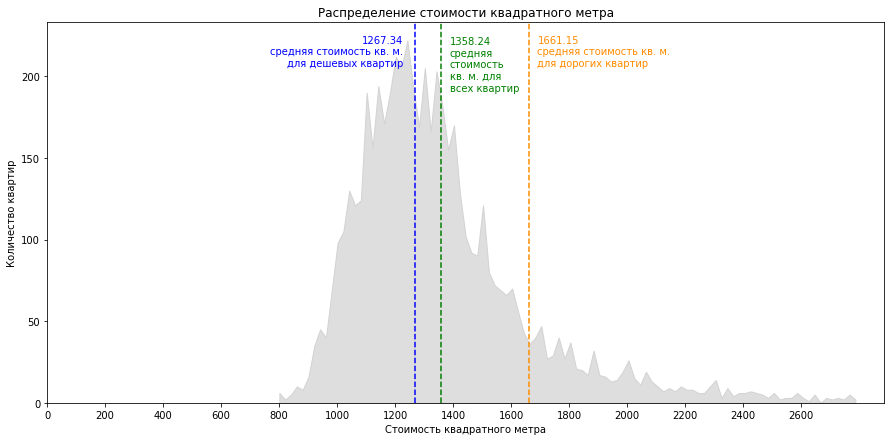

In [9]:
# визуализируем разброс цен за квадратный метр

plt.figure(figsize=(15, 7))

sns.histplot(data=df1['one_m_price'], bins=100, color='#d3d3d3', element='poly')

plt.title('Распределение стоимости квадратного метра')
plt.xlabel('Стоимость квадратного метра')
plt.ylabel('Количество квартир')

# добавляем значение средней стоимости квадратного метра

plt.axvline(
    one_m.loc[0, 'one_m_mean'],
    linestyle='--',
    color='green'
    )

plt.text(
    one_m.loc[0, 'one_m_mean'] + 30,
    190,
    '{}\nсредняя\nстоимость\nкв. м. для\nвсех квартир'.format(
        one_m.loc[0, 'one_m_mean']),
    color='green',
    ha='left',
    va='bottom',
    rotation='horizontal',
    fontsize=10
    )

# добавляем значение средней стоимости квадратного метра дешевых квартир

plt.axvline(
    one_m.loc[0, 'cheap_one_m_mean'],
    linestyle='--',
    color='blue'
    )

plt.text(
    one_m.loc[0, 'cheap_one_m_mean'] - 40,
    205,
    '{}\nсредняя стоимость кв. м.\nдля дешевых квартир'.format(
        one_m.loc[0, 'cheap_one_m_mean']),
    color='blue',
    ha='right',
    va='bottom',
    rotation='horizontal',
    fontsize=10
    )

# добавляем значение средней стоимости квадратного метра дорогих квартир

plt.axvline(
    one_m.loc[0, 'exp_one_m_mean'],
    linestyle='--',
    color='DarkOrange'
    )

plt.text(
    one_m.loc[0, 'exp_one_m_mean'] + 30,
    205,
    '{}\nсредняя стоимость кв. м.\nдля дорогих квартир'.format(
        one_m.loc[0, 'exp_one_m_mean']),
    color='DarkOrange',
    ha='left',
    va='bottom',
    rotation='horizontal',
    fontsize=10
    )

plt.xticks(np.arange(0, df1['one_m_price'].max(), 200))

plt.show()

## Задание 2

Составить классификацию домов по имеющимся параметрам.

Количество параметров для классификации определяется самостоятельно.

Рассчитать количество предложений и медианную цену для объектов каждого класса.

In [10]:
# применяем функцию для первичного обзора данных
first_check(df2)

Первые 10 строк таблицы 



,адрес,количество комнат,год постройки,материал стен,количество этажей,расстояние от центра
0,"Чернышевского ул., 11",1,1991,кирпич,9,до 1 км
1,"Сторожовская ул., 6",1,2011,каркас,24,до 1 км
2,"Коласа ул., 49",1,1968,кирпич,4,до 1 км
3,"Рокоссовского просп., 82",3,1996,кирпич,20,от 1 км
4,"Белецкого ул., 10/2",1,1988,панель,9,от 1 км
5,"Городской Вал ул., 9",2,1961,кирпич,7,до 1 км
6,"Казарменный пер., 5/а",2,1957,кирпич,5,до 1 км
7,"Купалы ул., 9",2,1956,кирпич,5,до 1 км
8,"Неманская ул., 2",3,2015,каркас,22,до 1 км
9,"Михайлова ул., 3",3,1950,кирпич,3,до 1 км


--------------------------------------------------
Последние 10 строк таблицы 



,адрес,количество комнат,год постройки,материал стен,количество этажей,расстояние от центра
5504,"Тикоцкого ул., 26",2,1976,панель,9,от 1 км
5505,"Белинского ул., 12",2,1962,панель,5,от 1 км
5506,"Матусевича ул., 68",2,2011,каркас,9,от 1 км
5507,"Лещинского ул., 13",1,1987,панель,9,до 1 км
5508,"Богдановича ул., 89",1,1985,кирпич,9,до 1 км
5509,"Связистов ул., 11",1,2010,каркас,20,от 1 км
5510,"Налибокская ул., 42",2,2012,панель,9,от 1 км
5511,"Лобанка ул., 11",1,1985,панель,9,до 1 км
5512,"Якубова ул., 28",3,1976,панель,9,от 1 км
5513,"Коласа ул., 65",2,1969,кирпич,8,от 1 км


--------------------------------------------------
Информация о таблице 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5514 entries, 0 to 5513
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   адрес                 5514 non-null   object
 1   количество комнат     5514 non-null   int64 
 2   год постройки         5514 non-null   int64 
 3   материал стен         5514 non-null   object
 4   количество этажей     5514 non-null   int64 
 5   расстояние от центра  5514 non-null   object
dtypes: int64(3), object(3)
memory usage: 258.6+ KB
--------------------------------------------------
Характеристики чисел в таблице 



,количество комнат,год постройки,количество этажей
count,5514.000000,5514.000000,5514.000000
mean,2.150889,1983.868517,8.602466
std,0.924745,20.248572,5.229689
min,1.000000,1917.000000,2.000000
25%,1.000000,1967.000000,5.000000
50%,2.000000,1980.000000,9.000000
75%,3.000000,2004.000000,9.000000
max,4.000000,2018.000000,32.000000


--------------------------------------------------
Наименование колонок 

Index(['адрес', 'количество комнат', 'год постройки', 'материал стен',
       'количество этажей', 'расстояние от центра'],
      dtype='object')
--------------------------------------------------
Количество дубликатов: 1313



In [11]:
# переименуем колонки для удобства
df2.columns = ['address', 'room_count', 'constr_year',
               'walls_material', 'floor_count', 'km_center']

In [12]:
# из описания данных видно, что все квартиры можно разделить на те, у которых
# 1, 2, 3 и 4 комнаты;
# самое старое здание в данных 1917 года постройки, а новое - 2018;
# поскольку "сталинки", "хрущёввки" и "брежневки" строились из разных
# материалов, из-за чего их сложно определить, то можно классифицировать здания
# по периодам, опираясь на годы строительства данных зданий;
# создадим для этого функцию

def year_period(year_col):
    if year_col < 1933:
        return "ранний СССР"
    if 1933 <= year_col < 1956:
        return "период сталинок"
    if 1956 <= year_col < 1965:
        return "период хрущёвок"
    if 1965 <= year_col < 1980:
        return "период брежневок"
    if 1980 <= year_col < 1991:
        return "поздний СССР"
    if 1991 <= year_col < 2010:
        return "современная Беларусь"
    if 2010 <= year_col:
        return "новый жилищный фонд"

In [13]:
# создадим колонку с классификацией по периодам строительства
df2['period'] = df2['constr_year'].apply(year_period)

In [14]:
# классификацию по материалам можно оставить такой, как она есть;
# выведим уникальные значения колонки
df2['walls_material'].value_counts()

панель    2926
кирпич    1719
каркас     869
Name: walls_material, dtype: int64

In [15]:
# также оставим классификацию по расстоянию до центра;
# выведим уникальные значения колонки
df2['km_center'].value_counts()

от 1 км    3244
до 1 км    2270
Name: km_center, dtype: int64

In [16]:
# классифицируем здания в зависимости от этажности, создав функцию

def floor_class(floor_col):
    if floor_col <= 2:
        return "малоэтажное"
    if 3 <= floor_col <= 5:
        return "средней этажности"
    if 6 <= floor_col <= 10:
        return "многоэтажное"
    if 11 <= floor_col <= 16:
        return "повышенной этажности"
    if 17 <= floor_col:
        return "высотное"

In [17]:
# создадим колонку с классификацией по количеству этажей
df2['floor_class'] = df2['floor_count'].apply(floor_class)

In [18]:
# судя по материалам, из которых изготовлены здания, и их этажности,
# вероятнее всего в наборе данных отсутствуют немногоквартирные дома,
# поэтому можно добавить еще одну классификаю, разработанную
# ГУП «Национальное кадастровое агентство»;
# обращаю внимание на то, данная классификация  имеет определение не для всех
# домов советского периода;
# заполняем новую колонку с классификацией

df2['class'] = np.where(
    
    (
        (df2['floor_count'] < 5) & (df2['walls_material'] == 'панель') &
        (df2['constr_year'] < 1977)
     ) |
     (
         (df2['floor_count'] < 4) & (df2['walls_material'] == 'кирпич') &
          (df2['constr_year'] < 1966)
     ),

      'эконом',

      np.where(
          (
              (df2['floor_count'] > 6) & (df2['walls_material'] == 'панель') &
              (df2['constr_year'] < 2000)
           ) |
           (
               (df2['floor_count'] > 6) & (df2['walls_material'] == 'кирпич') &
                (df2['constr_year'] < 1977)
           ),

            'стандарт',

            np.where(
                (
                    (df2['walls_material'] == 'панель') &
                    (df2['constr_year'] >= 2000)
                 ) |
                 (
                     (df2['floor_count'] >= 5) &
                      (df2['walls_material'] == 'панель') &
                      (df2['constr_year'] < 1977)
                  ) |
                  (
                      (df2['floor_count'] > 5) &
                      (df2['walls_material'] == 'кирпич') &
                      (
                          (1978 <= df2['constr_year']) &
                          (df2['constr_year'] <= 2000)
                       )
                  ),
                  
                  'улучшенное',
                  
                  np.where(
                      (
                          (df2['walls_material'] == 'каркас') |
                          (df2['walls_material'] == 'кирпич')
                       ) &
                       (df2['constr_year'] >= 2000),
                     
                     'комфорт',
                     
                     'другое'
                     )
                  )
            )
      )

In [19]:
# создаем функцию для поиска домов с классом "престиж",
# они попали в класс "комфорт"

def class_add(address):
    if address in ['Смолячкова ул., 4', 'Киселева ул., 17', 'Хоружей ул., 48/а',
                   'Победителей пр., 27', 'Независимости просп., 85/б',
                   'Старожевская ул., 6']:
        return 'престиж'
    else:
        return 'комфорт'

In [20]:
# применяем функцию
df2.loc[df2['class'] == 'комфорт', 'class'] = (
    df2.loc[df2['class'] == 'комфорт', 'address'].apply(class_add)
)

In [21]:
# добавляем цену из предыдущей таблицы
df2 = df2.merge(
    df1[['address', 'room_count', 'price']],
    left_on=['address', 'room_count'],
    right_on=['address', 'room_count'],
    how='left'
    ).drop_duplicates()

# проверяем, нет ли пропусков
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6732 entries, 0 to 12309
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   address         6732 non-null   object
 1   room_count      6732 non-null   int64 
 2   constr_year     6732 non-null   int64 
 3   walls_material  6732 non-null   object
 4   floor_count     6732 non-null   int64 
 5   km_center       6732 non-null   object
 6   period          6732 non-null   object
 7   floor_class     6732 non-null   object
 8   class           6732 non-null   object
 9   price           6732 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 578.5+ KB


In [22]:
# количество строк в таблице увеличилось, поскольку в базе есть несколько
# предложений по стоимости квартир по одному адресу с одинаковым количеством
# комнат;

# создаем функцию для вывода количества предложений и медианных цен для каждой
# категории по количеству комнат

def class_table(class_col):

    print('\nКоличество предложений для {}\n'.format(class_col))

    display(
        df2.pivot_table(
            index=class_col,
            columns='room_count',
            values='address',
            aggfunc='count')
    )
    
    print('\nМедиана цен для {}\n'.format(class_col))

    display(
        df2.pivot_table(
            index=class_col,
            columns='room_count',
            values='price',
            aggfunc='median'
            )
    )

    print()
    print('_'*50)

In [23]:
# применяем функцию

for col in df2[[
    'walls_material', 'km_center', 'period', 'floor_class', 'class']].columns:
    class_table(col)


Количество предложений для walls_material



room_count,1,2,3,4
walls_material,,,,
каркас,467,356,421,132
кирпич,517,848,507,98
панель,1072,1152,898,264



Медиана цен для walls_material



room_count,1,2,3,4
walls_material,,,,
каркас,70576.0,97266.5,144845.0,196455.5
кирпич,45000.0,62009.0,89014.0,132021.5
панель,47985.0,60921.0,79002.0,85040.0



__________________________________________________

Количество предложений для km_center



room_count,1,2,3,4
km_center,,,,
до 1 км,859,1025,792,217
от 1 км,1197,1331,1034,277



Медиана цен для km_center



room_count,1,2,3,4
km_center,,,,
до 1 км,55008.0,70013.0,110027.0,129960.0
от 1 км,47009.0,61482.0,82008.5,94977.0



__________________________________________________

Количество предложений для period



room_count,1,2,3,4
period,,,,
новый жилищный фонд,591,390,477,106
период брежневок,508,763,426,115
период сталинок,12,130,99,22
период хрущёвок,221,513,171,10
поздний СССР,406,285,222,86
ранний СССР,7,1,5,3
современная Беларусь,311,274,426,152



Медиана цен для period



room_count,1,2,3,4
period,,,,
новый жилищный фонд,67020.0,90009.5,136030.0,195739.5
период брежневок,45010.0,56902.0,69900.0,71820.0
период сталинок,66008.0,107998.5,108016.0,151004.0
период хрущёвок,43496.0,55980.0,79993.0,124973.0
поздний СССР,45014.0,62923.0,77909.5,87974.0
ранний СССР,63913.0,98998.0,92973.0,112006.0
современная Беларусь,52511.0,73956.5,93000.0,110019.0



__________________________________________________

Количество предложений для floor_class



room_count,1,2,3,4
floor_class,,,,
высотное,359,195,247,48
малоэтажное,7,50,23,5
многоэтажное,1216,1003,1057,329
средней этажности,474,1108,499,112



Медиана цен для floor_class



room_count,1,2,3,4
floor_class,,,,
высотное,70691.0,97065.0,142956.0,188231.5
малоэтажное,44988.0,46467.5,71008.0,224964.0
многоэтажное,49509.0,67012.0,85020.0,101038.0
средней этажности,43510.0,56018.0,73931.0,85010.0



__________________________________________________

Количество предложений для class



room_count,1,2,3,4
class,,,,
другое,358,686,316,55
комфорт,462,322,418,113
престиж,1,8,24,17
стандарт,744,560,511,183
улучшенное,461,688,504,122
эконом,30,92,53,4



Медиана цен для class



room_count,1,2,3,4
class,,,,
другое,43996.5,61015.5,85981.5,121532.0
комфорт,70576.0,99953.5,145012.0,196480.0
престиж,102125.0,351379.5,317331.0,335097.0
стандарт,46004.0,63500.5,75980.0,86009.0
улучшенное,52488.0,59759.5,86010.0,94984.0
эконом,45502.0,48458.5,72989.0,106980.0



__________________________________________________


## Задание 3

Нанести на карту данные с отображением цен квадратного метра. 

Описать выводы, которые можно сделать по данной визуализации. 

**Процесс выполнения**

Был подготовлен excel-файл, в котором были переименованы колонки на английский для удобства.  

После загрузки данных в Tableau, колонкам с широтой и долготой был присвоен соответствующий тип данных. Координаты были нанесены на карту, адрес добавлен в детали. Была добавлена стоимость квадратного метра с помощью формулы [flat_price]/[square]. Полученное значение было добавлено в обозначение цвета. Сделано отображение в подсказках адреса дома, средней стоимости кв. м., средней стоимости и средней площади квартиры в нем. 

Был сформирован дашборд с добавлением фильтров для показателей стоимости квадратного метра, стоимости и площади квартир. Интерактивный дашборд доступен по [ссылке](https://public.tableau.com/app/profile/valeryia1682/viz/FlatPricesMinsk/FlatpricesMinsk).

**Выводы**

1. Самый дорогой кв. м. находится: 
  * в периметре парка Горького, ж/д вокзала, ул. Интернациональная и ул. Кирова; 
  * в Раковском и Троицком предместье, Золотой Горке; 
  * по ул. Пионерская; 
  * в периметре парка Челюскинцев, ул. Якуба Колоса, ул. Толбухина и ул. Сурганова; 
  * в районе Парниковой и Тепличной улиц. 

2. При отдалении от центра Минска стоимость квадратного метра уменьшается. Скопление дешевых квартир находится вдоль 2-ого и 17-ого км МКАД. 

3. Дом с самым дорогим средним кв. м. (2 798) находится по пр. Независимости, 78а, а самым дешевым (791) – по ул. Карвата, 56. 

4. Здание с самой дорогой средней ценой квартиры расположено по адресу ул. Сторожовская, 6 (459 237), а самой дешевой (29 986) по ул. Варвашени, 10. 

5. Самая маленькая средняя площадь квартир отмечена у д. 6/1 по ул. Чигладзе (22 кв. м.), а самая большая – в д. 16 по ул. Весенней (281,8 кв. м.). 